In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
class Obstaculo():
    def __init__(self, limxMax, limxMin ,limyMax, limyMin):
        self.limites = [limxMax, limxMin ,limyMax, limyMin]

    def in_collision(self, x, y):
        if self.limites[0]>= x >= self.limites[1] and self.limites[2]>= y >= self.limites[3]:
            return True
        return False

class Obstaculo_circulo():
    def __init__(self, centerx, centery, radius):
        self.center = [centerx, centery]
        self.radius = radius
    
    def in_collision(self, x, y):
        d = np.sqrt((x-self.center[0])**2 + (y-self.center[1])**2)
        if d <= self.radius:
            return True
        return False
    


In [5]:
obst1 = Obstaculo(5, -5, 15, 8)

#obst1.in_collision(2,10)
obst1.in_collision(0,0)

#obstCircle = Obstaculo_circulo(2,2,5)#centro en 2,2 y con un radio de 5
#obstCircle.in_collision(8,5)

False

In [6]:
visitados=[]
por_visitar=[]
limx = [-20,20]
limy = [-20,20]
class Nodo():
    
    def __init__(self, pos=[0,0], papa=None):
        self.pos = pos
        self.hijos=[]
        self.papa = papa
        self.h = 0
        if papa:
            self.costo= papa.costo +1
        else: 
            self.costo = 0
        #self.costo = costo + 1
        
    def genera_hijos(self, obstaculos):
        
        pos_arriba = [self.pos[0], self.pos[1]+1] #movemos y+1
        
        pos_der = [self.pos[0]+1, self.pos[1]] #movemos x+1
        
        pos_abajo = [self.pos[0], self.pos[1]-1] #movemos y-1
        
        pos_izq = [self.pos[0]-1, self.pos[1]] #movemos x-1
        
        if pos_arriba[1] < limy[1]:# pos_arriba[y] debe ser menor que límite superior y
            se_puede = True
            for ob in obstaculos:
                if (ob.in_collision(pos_arriba[0], pos_arriba[1])):
                    se_puede = False
                    break
            if se_puede:
                self.hijos.append(Nodo(pos_arriba,self))
        if pos_der[0] < limx[1]:# pos_der[x] debe ser menor que límite superior x
            se_puede = True
            for ob in obstaculos:
                if (ob.in_collision(pos_der[0], pos_der[1])):
                    se_puede = False
                    break
            if se_puede:
                self.hijos.append(Nodo(pos_der,self))
        if limy[0] < pos_abajo[1]: #pos_abajo[y] debe ser mayor que límite inferior y
            se_puede = True
            for ob in obstaculos:
                if (ob.in_collision(pos_abajo[0], pos_abajo[1])):
                    se_puede = False
                    break
            if se_puede:
                self.hijos.append(Nodo(pos_abajo,self))
        if limx[0]< pos_izq[0]: #pos_izq[x] debe ser mayor que límite inferior x   
            se_puede = True
            for ob in obstaculos:
                if (ob.in_collision(pos_izq[0], pos_izq[1])):
                    se_puede = False
                    break
            if se_puede:
                self.hijos.append(Nodo(pos_izq,self))
    
    def bpp(self, goalpos, obstaculos): #búsqueda primero en profundidad
        if self.pos in visitados:
            return None
        if self.pos == goalpos:
            return [self] # si lo encontramos entonces vamos a regresar una lista con el último
        self.genera_hijos(obstaculos)
        visitados.append(self.pos)       
        for hijo in self.hijos:
            tray = hijo.bpp(goalpos, obstaculos)
            if tray!= None:
                tray.append(self)
                return tray
        return None

    def bpa(self, goalpos, obstaculos):
        if self in visitados:
            return None
        if self.pos == goalpos:
            return [self] # si lo encontramos entonces vamos a regresar una lista con el último      
        self.genera_hijos(obstaculos)
        visitados.append(self)
        por_visitar = self.hijos.copy()
        #for hijo in por_visitar:
        while por_visitar != []:
            hijo = por_visitar.pop(0)
            if not hijo in visitados:                
                if hijo.pos == goalpos:
                    #return [self]
                    trayectoria = [hijo]
                    padre = hijo.papa
                    while padre:
                        trayectoria.append(padre)
                        padre = padre.papa
                    return trayectoria
                hijo.genera_hijos(obstaculos)
                por_visitar = por_visitar + hijo.hijos.copy()
                visitados.append(hijo) 
        return []

    def heuristica(self, goalpos): # esta es la función h(n)
        self.h = np.sqrt((goalpos[0] - self.pos[0])**2 + (goalpos[1] - self.pos[1])**2)
        return self.h
        
    def f_n(self, goalpos):
        self.f = self.costo + self.heuristica(goalpos) 
        return self.f 
        
    def a_estrella(self, goalpos, obstaculos):
        vistados = []
        por_visitar = [self]
        while por_visitar != []:
            hijo = por_visitar.pop(0)
            if not hijo in visitados:                
                if hijo.pos == goalpos:
                    #return [self]
                    trayectoria = [hijo]
                    padre = hijo.papa
                    while padre:
                        trayectoria.append(padre)
                        padre = padre.papa
                    return trayectoria
                hijo.genera_hijos(obstaculos)
                for nieto in hijo.hijos:
                    nieto.f_n(goalpos)
                por_visitar = por_visitar + hijo.hijos.copy()
                por_visitar = sorted(por_visitar, key = lambda node:node.f)
                visitados.append(hijo) 
        return []  
    
    def greedy(self, goalpos, obstaculos):
        vistados = []
        por_visitar = [self]
        while por_visitar != []:
            hijo = por_visitar.pop(0)
            if not hijo in visitados:                
                if hijo.pos == goalpos:
                    #return [self]
                    trayectoria = [hijo]
                    padre = hijo.papa
                    while padre:
                        trayectoria.append(padre)
                        padre = padre.papa
                    return trayectoria
                hijo.genera_hijos(obstaculos)
                for nieto in hijo.hijos:
                    nieto.heuristica(goalpos)
                por_visitar = por_visitar + hijo.hijos.copy()
                por_visitar.sort()
                visitados.append(hijo) 
        return []  
    
    def to_list(self):
        list_of_nodes = [self]
        for h in self.hijos:
            list_of_nodes = list_of_nodes + h.to_list()
        return list_of_nodes
    
    def __repr__(self):
        return str(f"x:{self.pos[0]},y:{self.pos[1]}")

    def __eq__(self, elotro):
        if self is not None and elotro is not None:
            if self.pos == elotro.pos:
                return True
            else:
                return False
    #nodo1 < nodo2
    def __lt__(self, elotro):
        return self.h < elotro.h
            

In [62]:
class Robot():
    def __init__(self, dof, numb=1):
        self.dof = dof
        self.model = None
        self.num_bodies = numb
        self.global_position = [0,0]
        self.trajectory = []
        self.espacio_estados = []
        self.obstaculos = []
        
    def add_obstacle(self, limxMax, limxMin ,limyMax, limyMin):
        self.obstaculos.append(Obstaculo(limxMax, limxMin ,limyMax, limyMin))
        
    def add_circle_obstacle(self, centerx, centery,rad):
        self.obstaculos.append(Obstaculo_circulo(centerx, centery, rad))

    def get_obst_circle(self):
        for obs in self.obstaculos:
            if isinstance(obs, Obstaculo_circulo):
                return plt.Circle(obs.center, obs.radius, fill=False)
                
    def draw_obstacles(self, canvas):
        for obs in self.obstaculos:
            if isinstance(obs, Obstaculo_circulo):
                obscirc= plt.Circle(obs.center, obs.radius, fill=False)
                canvas.add_artist(obscirc)
            else:
                #print("cuadrado")
                canvas.plot(
                    [obs.limites[1], obs.limites[0], obs.limites[0], obs.limites[1], obs.limites[1]],
                    [obs.limites[3], obs.limites[3], obs.limites[2], obs.limites[2], obs.limites[3]],
                    color = 'red'
                )
                
    def draw_generated_nodes(self, canvas):
        if self.raiz != None:
            for nodo in self.raiz.to_list():
                canvas.scatter(x=nodo.pos[0], y=nodo.pos[1], marker = '*' , color='blue')
        else:
            print("Calcular la Trayectoria primero")
    
    def draw_trajectory (self, canvas):
        lasx = []
        lasy = []
        for estado in self.trajectory:
            x,y =estado.pos    
            lasx.append(x)
            lasy.append(y)
        if lasx!=[]:
            canvas.scatter(x=lasx[0],y=lasy[0])
            canvas.scatter(x=lasx[1:],y=lasy[1:])
        canvas.scatter(x=self.raiz.pos[0],y=self.raiz.pos[1], marker="^", color="yellow")
        
    def plot_all(self):
        fig, ax = plt.subplots()
        ax.set_xlim(-20,20)
        ax.set_ylim(-20,20)
        self.draw_generated_nodes(ax)
        
        ax.plot(
            [limx[0], limx[1], limx[1], limx[0], limx[0]],
            [limy[1], limy[1], limy[0], limy[0], limy[1]],
            color = 'purple'
        )
        
        ax.set_aspect(1)
        self.draw_trajectory(ax)
        self.draw_obstacles(ax)      
    
    def move(self, pos):
        #self.trajectory.append(self.global_position.copy()) # o también self.global_position[:]
        for x in range(pos[0]+1):
            self.global_position[0] = x 
            self.trajectory.append(self.global_position.copy())
        for y in range(pos[1]+1):
            self.global_position[1] = y
            self.trajectory.append(self.global_position.copy())

    def busca_camino_goal(self, goalpos, search_mode="bpp"):
        self.raiz = Nodo(self.global_position)
        if search_mode == "bpp":
            self.trajectory = self.raiz.bpp(goalpos, self.obstaculos)
        elif search_mode == "bpa":
            self.trajectory = self.raiz.bpa(goalpos, self.obstaculos)
        elif search_mode == "greedy":
            self.trajectory = self.raiz.greedy(goalpos, self.obstaculos)
        elif search_mode == "A*":
            self.trajectory = self.raiz.a_estrella(goalpos, self.obstaculos)
        return self.trajectory
            
    def get_occupancy_grid(self):
        grid = {}
        grid2 = np.zeros((40,40))
        for x in range(limx[0],limx[1]):
            for y in range (limy[0],limy[1]):  
                grid[str(x)+","+str(y)] = 0
                
                for obs in self.obstaculos:
                    if obs.in_collision(x,y):
                        print(x,y)
                        grid[str(x)+","+str(y)] = 1   
                        grid2[x+20,y+20] = 1
        return grid, grid2

    def draw_occupancy_grid(self):
        fig, ax = plt.subplots()
        ax.set_xlim(-20,20)
        ax.set_ylim(-20,20)
        ax.plot(
            [limx[0], limx[1], limx[1], limx[0], limx[0]],
            [limy[1], limy[1], limy[0], limy[0], limy[1]],
            color = 'purple'
        )
        for x in range(limx[0],limx[1]):
            for y in range(limx[0], limy[1]):
                if (grid[str(x)+","+str(y)]):
                    plt.scatter(x=x,y=y, c="black")
        
    def next_positions(self):
        mi_pos = Nodo(self.global_position)
        mi_pos.genera_hijos()
        tray= [mi_pos.pos,mi_pos.hijos[0].pos,mi_pos.hijos[1].pos,mi_pos.hijos[2].pos,mi_pos.hijos[3].pos]
        return tray
            
robot1 = Robot(6)
robot2 = Robot(3,3)


In [63]:
visitados=[]
robot1 = Robot(6)
#print(robot1.dof)
#tray = robot1.next_positions()
robot1.add_obstacle(5, -5, 15, 8)
robot1.add_circle_obstacle(10,0,5)
tray = robot1.busca_camino_goal([12,10])
#print(tray)
lasx = []
lasy = []
for estado in tray:
    x,y =estado.pos    
    lasx.append(x)
    lasy.append(y)


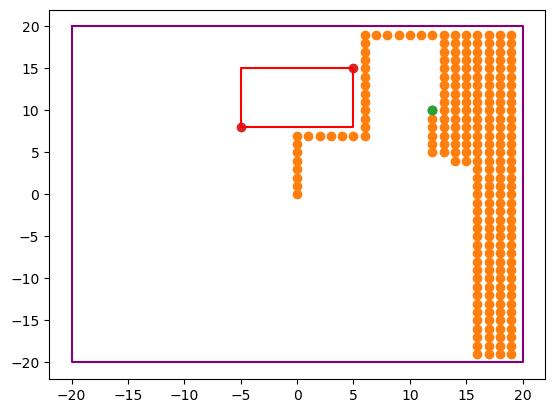

In [64]:
lasx
plt.scatter(x=lasx[0],y=lasy[0])
plt.scatter(x=lasx[1:],y=lasy[1:])
plt.scatter(x=12,y=10)
plt.plot(
    [limx[0], limx[1], limx[1], limx[0], limx[0]],
    [limy[1], limy[1], limy[0], limy[0], limy[1]],
    color = 'purple'
)
plt.scatter(x=obst1.limites[:2], y=obst1.limites[2:])
plt.plot(
    [obst1.limites[1], obst1.limites[0], obst1.limites[0], obst1.limites[1], obst1.limites[1]],
    [obst1.limites[3], obst1.limites[3], obst1.limites[2], obst1.limites[2], obst1.limites[3]],
    color = 'red'
)



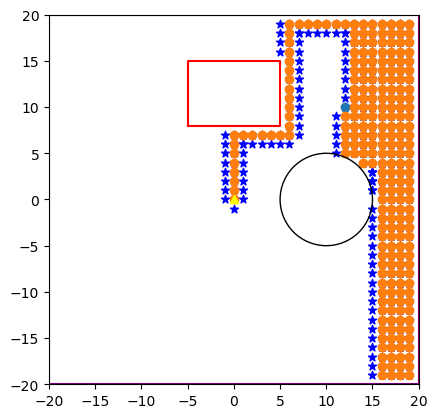

In [28]:
#obstCircle = Obstaculo_circulo(10,0,5)#centro en 2,2 y con un radio de 5


fig, ax = plt.subplots()
#elcirculo = robot1.get_obst_circle()
#elciculo = plt.Circle(obstCircle.center, obstCircle.radius, fill=False)
#elciculo = plt.Circle((.2,.2), .3)

ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
robot1.draw_generated_nodes(ax)

ax.plot(
    [limx[0], limx[1], limx[1], limx[0], limx[0]],
    [limy[1], limy[1], limy[0], limy[0], limy[1]],
    color = 'purple'
)
#ax.scatter(x=obst1.limites[:2], y=obst1.limites[2:])
#ax.plot(
#    [obst1.limites[1], obst1.limites[0], obst1.limites[0], obst1.limites[1], obst1.limites[1]],
#    [obst1.limites[3], obst1.limites[3], obst1.limites[2], obst1.limites[2], obst1.limites[3]],
#    color = 'red'
#)

ax.set_aspect(1)
robot1.draw_trajectory(ax)
robot1.draw_obstacles(ax)

#ax.add_artist(elcirculo)

In [74]:
visitados =[]
por_visitar=[]
tray = robot1.busca_camino_goal([12,10], "bpa")

cuadrado


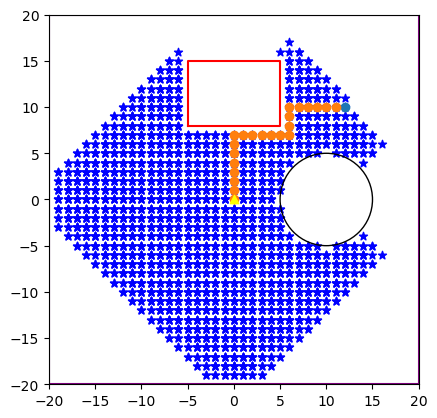

In [75]:
fig, ax = plt.subplots()
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
robot1.draw_generated_nodes(ax)
ax.plot(
    [limx[0], limx[1], limx[1], limx[0], limx[0]],
    [limy[1], limy[1], limy[0], limy[0], limy[1]],
    color = 'purple'
)
ax.set_aspect(1)
robot1.draw_trajectory(ax)
robot1.draw_obstacles(ax)


In [72]:
robot1.add_obstacle(5, -5, 15, 8)
robot1.add_circle_obstacle(10,0,5)
tray = robot1.busca_camino_goal([12,10], "greedy")

cuadrado


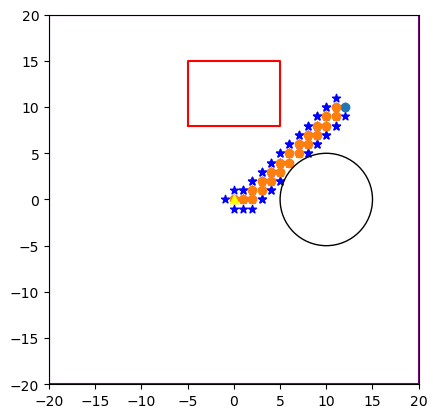

In [73]:
fig, ax = plt.subplots()
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
robot1.draw_generated_nodes(ax)
ax.plot(
    [limx[0], limx[1], limx[1], limx[0], limx[0]],
    [limy[1], limy[1], limy[0], limy[0], limy[1]],
    color = 'purple'
)
ax.set_aspect(1)
robot1.draw_trajectory(ax)
robot1.draw_obstacles(ax)

In [22]:
visitados =[]
por_visitar=[]
tray = robot1.busca_camino_goal([12,10], "A*")


cuadrado


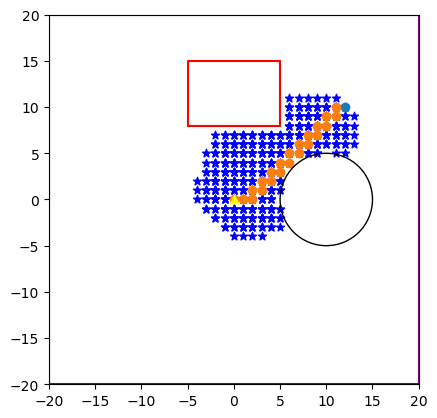

In [23]:
robot1.plot_all()

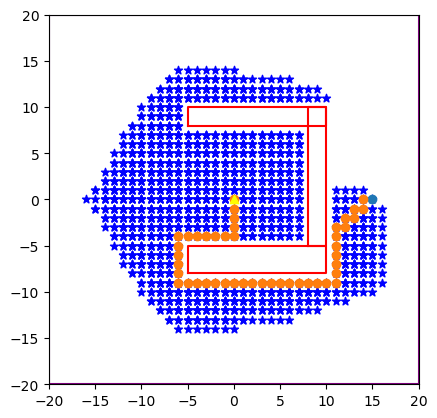

In [49]:
visitados = []
por_visitar = []
robot2 = Robot(6)
robot2.add_obstacle(10, -5, 10, 8)
robot2.add_obstacle(10, -5, -5, -8)
robot2.add_obstacle(10, 8, 10, -5)
#robot2.add_circle_obstacle(10,0,5)
tray = robot2.busca_camino_goal([15,0], "A*")
robot2.plot_all()

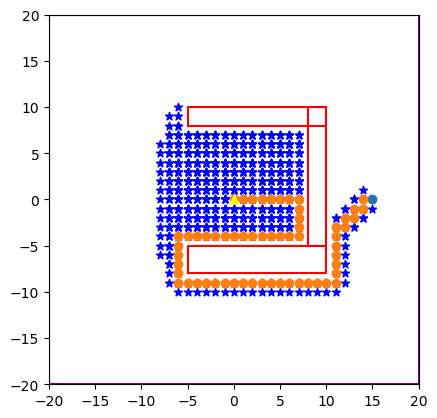

In [50]:
visitados = []
por_visitar = []
robot2 = Robot(6)
robot2.add_obstacle(10, -5, 10, 8)
robot2.add_obstacle(10, -5, -5, -8)
robot2.add_obstacle(10, 8, 10, -5)
#robot2.add_circle_obstacle(10,0,5)
tray = robot2.busca_camino_goal([15,0], "greedy")
robot2.plot_all()

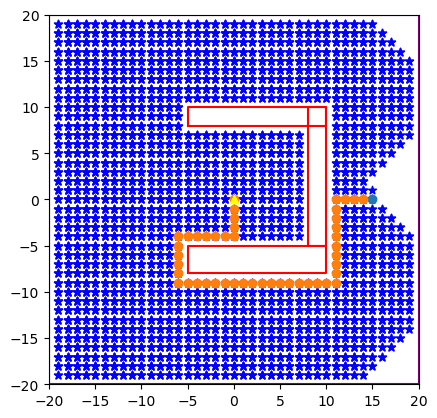

In [51]:
visitados = []
por_visitar = []
robot2 = Robot(6)
robot2.add_obstacle(10, -5, 10, 8)
robot2.add_obstacle(10, -5, -5, -8)
robot2.add_obstacle(10, 8, 10, -5)
#robot2.add_circle_obstacle(10,0,5)
tray = robot2.busca_camino_goal([15,0], "bpa")
robot2.plot_all()

ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito
ya se visito

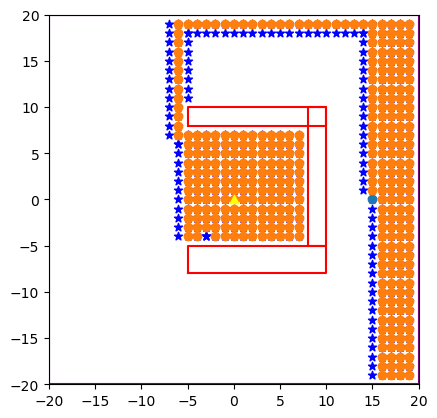

In [56]:
visitados = []
por_visitar = []
robot2 = Robot(6)
robot2.add_obstacle(10, -5, 10, 8)
robot2.add_obstacle(10, -5, -5, -8)
robot2.add_obstacle(10, 8, 10, -5)
#robot2.add_circle_obstacle(10,0,5)
tray = robot2.busca_camino_goal([15,0], "bpp")
robot2.plot_all()

hay que traducir nuestro entorno en un grid de ocupación

In [112]:
grid, grid2 = robot1.get_occupancy_grid()
#grid

-5 8
-5 9
-5 10
-5 11
-5 12
-5 13
-5 14
-5 15
-4 8
-4 9
-4 10
-4 11
-4 12
-4 13
-4 14
-4 15
-3 8
-3 9
-3 10
-3 11
-3 12
-3 13
-3 14
-3 15
-2 8
-2 9
-2 10
-2 11
-2 12
-2 13
-2 14
-2 15
-1 8
-1 9
-1 10
-1 11
-1 12
-1 13
-1 14
-1 15
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
5 0
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
6 -3
6 -2
6 -1
6 0
6 1
6 2
6 3
7 -4
7 -3
7 -2
7 -1
7 0
7 1
7 2
7 3
7 4
8 -4
8 -3
8 -2
8 -1
8 0
8 1
8 2
8 3
8 4
9 -4
9 -3
9 -2
9 -1
9 0
9 1
9 2
9 3
9 4
10 -5
10 -4
10 -3
10 -2
10 -1
10 0
10 1
10 2
10 3
10 4
10 5
11 -4
11 -3
11 -2
11 -1
11 0
11 1
11 2
11 3
11 4
12 -4
12 -3
12 -2
12 -1
12 0
12 1
12 2
12 3
12 4
13 -4
13 -3
13 -2
13 -1
13 0
13 1
13 2
13 3
13 4
14 -3
14 -2
14 -1
14 0
14 1
14 2
14 3
15 0


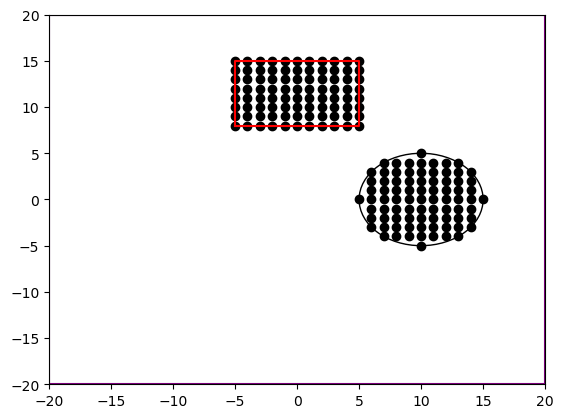

In [47]:
fig, ax = plt.subplots()
ax.set_xlim(-20,20)
ax.set_ylim(-20,20)
ax.plot(
    [limx[0], limx[1], limx[1], limx[0], limx[0]],
    [limy[1], limy[1], limy[0], limy[0], limy[1]],
    color = 'purple'
)
for x in range(limx[0],limx[1]):
    for y in range(limx[0], limy[1]):
        if (grid[str(x)+","+str(y)]):
            plt.scatter(x=x,y=y, c="black")
            
robot1.draw_obstacles(ax)

In [48]:
grid["-5,12"]

1

In [49]:
grid["10,0"]

1

In [53]:
grid2 = np.zeros((40,40))

In [66]:
grid2[grid2==1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [71]:
X.shape

(1000, 20, 20)

array([[0.16851752, 0.36501104, 0.50250286, ..., 0.06645764, 0.69685731,
        0.15796292],
       [0.16662717, 0.40040861, 0.39503403, ..., 0.14257511, 0.38804213,
        0.28656997],
       [0.39896915, 0.45869588, 0.56053505, ..., 0.45291987, 0.07734847,
        0.50381826],
       ...,
       [0.37411456, 0.47695945, 0.33012867, ..., 0.59470952, 0.35699956,
        0.77070106],
       [0.83171141, 0.45652671, 0.23455431, ..., 0.2042142 , 0.498428  ,
        0.88013277],
       [0.95073314, 0.2561499 , 0.58142435, ..., 0.74848897, 0.56229309,
        0.95383279]])

In [97]:
puntos = np.random.randint(-20, 20,(1000,2,2))
#np.random.uniform(-20, 20, (n_samples, 20, 20))

In [98]:
puntos

array([[[ 14, -20],
        [ 17, -14]],

       [[ -3,   3],
        [ 15,  16]],

       [[ 16, -13],
        [ -1,  18]],

       ...,

       [[-16,  -2],
        [-10, -19]],

       [[  7, -13],
        [ 10,  -5]],

       [[ 12, -14],
        [-18,   8]]])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


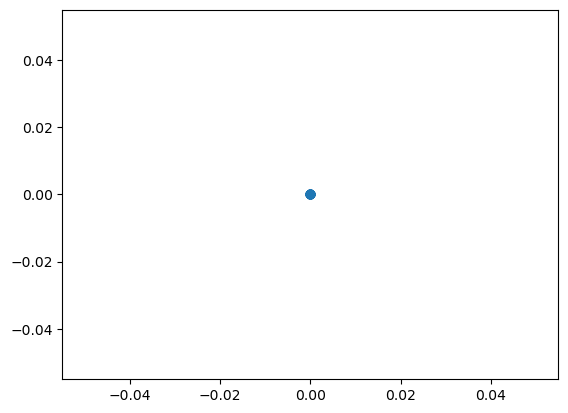

In [118]:
list_maps=[]
for punto1, punto2 in puntos:
    gridtmp = grid2.copy()
    gridtmp[punto1[0], punto1[1]] = 2
    gridtmp[punto2[0],punto2[1]] = 3
    
    list_maps.append(gridtmp)
list_maps  

gridplot=list_maps[0]
plt.scatter(x=range(len(grid2)),y=grid2[:,:])
print(gridplot)

In [119]:
grid2[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [126]:
x, y = np.indices(grid2.shape)
values = grid2.flatten()

In [127]:
x

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [37, 37, 37, ..., 37, 37, 37],
       [38, 38, 38, ..., 38, 38, 38],
       [39, 39, 39, ..., 39, 39, 39]])

In [128]:
y

array([[ 0,  1,  2, ..., 37, 38, 39],
       [ 0,  1,  2, ..., 37, 38, 39],
       [ 0,  1,  2, ..., 37, 38, 39],
       ...,
       [ 0,  1,  2, ..., 37, 38, 39],
       [ 0,  1,  2, ..., 37, 38, 39],
       [ 0,  1,  2, ..., 37, 38, 39]])

In [129]:
values

array([0., 0., 0., ..., 0., 0., 0.])

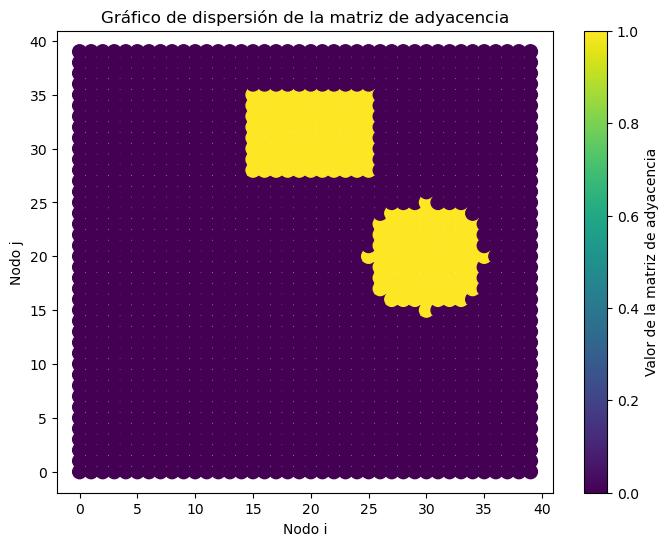

In [132]:
# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sc = plt.scatter(x.flatten(), y.flatten(), c=values, cmap='viridis', s=100)

# Añadir barra de colores
plt.colorbar(sc, label='Valor de la matriz de adyacencia')

# Etiquetas y título
plt.xlabel('Nodo i')
plt.ylabel('Nodo j')
plt.title('Gráfico de dispersión de la matriz de adyacencia')

# Mostrar el gráfico
plt.show()

In [170]:
n_samples = 1000
puntos = np.random.randint(-20, 20,(n_samples,2,2))

list_maps=[]
list_maps_out = []
for punto1, punto2 in puntos:
    gridtmp = grid2.copy()
    gridout = grid2.copy()
    gridtmp[punto1[0]+20, punto1[1]+20] = 2
    gridtmp[punto2[0]+20,punto2[1]+20] = 3
    visitados =[]
    por_visitar=[]
    rx = robot1
    rx.global_position = punto1.tolist()
    tray = rx.busca_camino_goal(punto2.tolist(), "A*")
    for nodo in tray:
        ex,ey = nodo.pos
        gridout[ex+20,ey+20] = 4
    list_maps.append(gridtmp)
    list_maps_out.append(gridout)

#x, y = np.indices(grid2.shape)
#values = grid2.flatten()

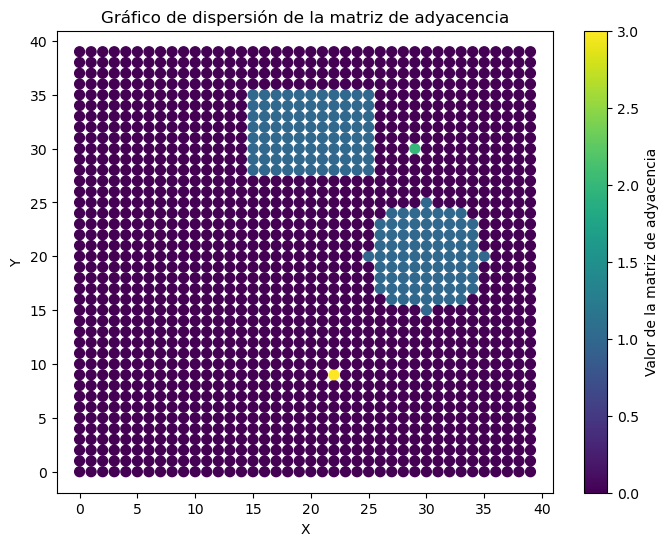

In [171]:
plt.figure(figsize=(8, 6))

mapa=list_maps[-1]
#for mapa in list_maps:
x, y = np.indices(mapa.shape)
values = mapa.flatten()
sc = plt.scatter(x.flatten(), y.flatten(), c=values, cmap='viridis', s=50)

# Añadir barra de colores
plt.colorbar(sc, label='Valor de la matriz de adyacencia')

# Etiquetas y título
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de dispersión de la matriz de adyacencia')

# Mostrar el gráfico
plt.show()

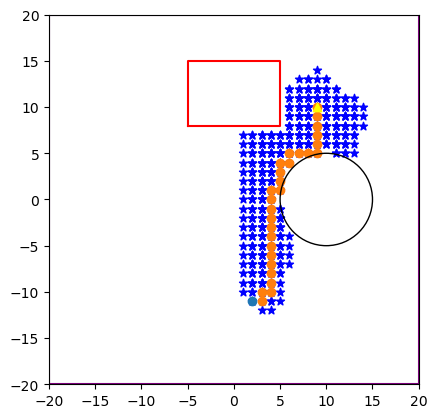

In [172]:
robot1.plot_all()

In [173]:
X = np.array(list_maps[:700])
y = np.array(list_maps_out[:700])
y.shape
xtest = np.array(list_maps[700:])
ytest = np.array(list_maps_out[700:])

In [174]:
ytest.shape

(300, 40, 40)

In [191]:
import numpy as np
from sklearn.neural_network import MLPRegressor, MLPClassifier

# Generar datos de ejemplo
# Supongamos que tenemos 1000 ejemplos de matrices 40x40 de entrada y salida

#X = np.random.rand(n_samples, 20, 20)
#y = np.random.rand(n_samples, 20, 20)




In [179]:
# Redimensionar los datos para que puedan ser procesados por MLPRegressor
# MLPRegressor espera datos en 2D, así que convertimos las matrices 40x40 a vectores de longitud 400
X = X.reshape(700, 1600)
y = y.reshape(700, 1600)

In [180]:
X.shape

(700, 1600)

In [182]:
xtest = xtest.reshape(300,1600)
#ytest = ytest.reshape(300,1600)

In [207]:
# Crear el modelo
# Puedes ajustar los parámetros del MLPRegressor según tus necesidades
model = MLPRegressor(hidden_layer_sizes=(1024, 1024), activation='relu', max_iter=100000)

# Entrenar el modelo
model.fit(X, y)

# Predecir nuevas matrices
# Generar un nuevo conjunto de matrices de prueba
#X_test = np.random.rand(10, 20, 20)  # Por ejemplo, 10 nuevas matrices
#X_test = X_test.reshape(10, 400)

# Hacer predicciones
y_pred = model.predict(xtest)

# Volver a convertir las predicciones a la forma original de 20x20
y_pred = y_pred.reshape(300, 40, 40)

#print("Predicciones de prueba (matrices de 20x20):")
#print(y_pred)


In [184]:
#y_pred = y_pred.reshape(300, 40, 40)

In [185]:
def plot_grid(grid):
    plt.figure(figsize=(8, 6))
    
    #mapa=list_maps[-1]
    #for mapa in list_maps:
    x, y = np.indices(grid.shape)
    values = grid.flatten()
    sc = plt.scatter(x.flatten(), y.flatten(), c=values, cmap='viridis', s=50)
    
    # Añadir barra de colores
    plt.colorbar(sc, label='correspondencia')
    
    # Etiquetas y título
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Mapa')
    
    # Mostrar el gráfico
    plt.show()

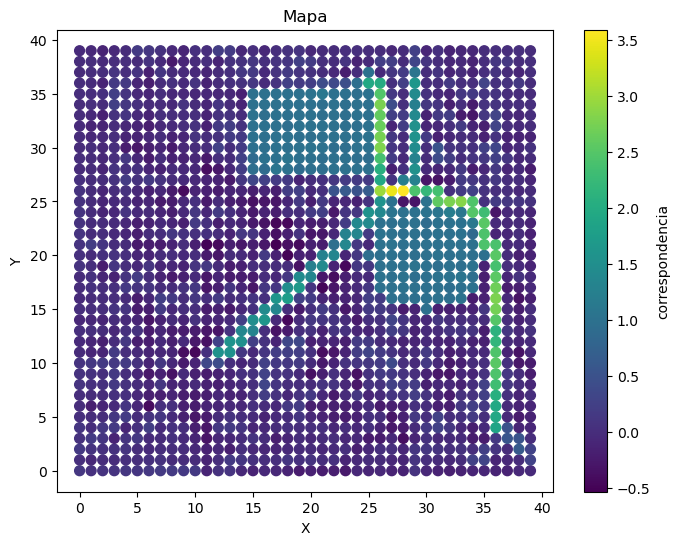

In [208]:
plot_grid(y_pred[0])

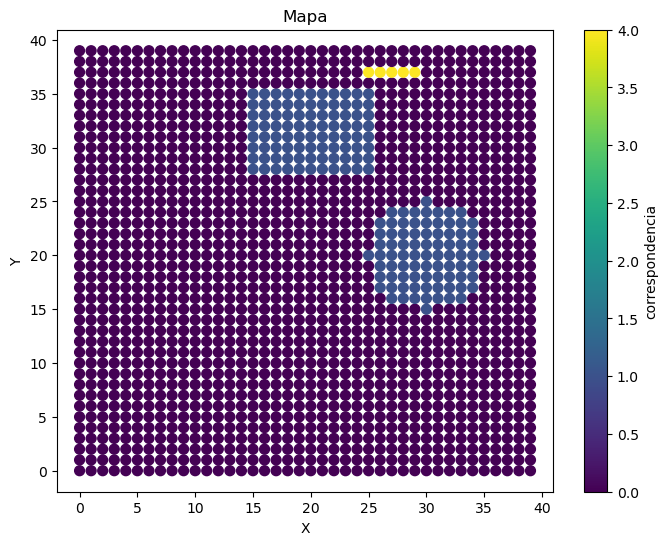

In [205]:
ytest = ytest.reshape(300,40,40)
plot_grid(ytest[0])

In [212]:
n_samples = 1000
puntos = np.random.randint(-20, 20,(n_samples,2,2))

list_maps=[]
list_maps_out = []
for punto1, punto2 in puntos:
    gridtmp = np.zeros(grid2.shape)
    gridout = np.zeros(grid2.shape)
    gridtmp[punto1[0]+20, punto1[1]+20] = 1
    gridtmp[punto2[0]+20,punto2[1]+20] = 1
    visitados =[]
    por_visitar=[]
    rx = robot1
    rx.global_position = punto1.tolist()
    tray = rx.busca_camino_goal(punto2.tolist(), "A*")
    for nodo in tray:
        ex,ey = nodo.pos
        gridout[ex+20,ey+20] = 1
    list_maps.append(gridtmp)
    list_maps_out.append(gridout)

In [219]:
X = np.array(list_maps[:700])
y = np.array(list_maps_out[:700])
xtest = np.array(list_maps[700:])
ytest = np.array(list_maps_out[700:])
X = X.reshape(700, 1600)
y = y.reshape(700, 1600)
xtest = xtest.reshape(300, 1600)

In [216]:
#xtest = xtest.reshape(300, 1600)

AttributeError: 'builtin_function_or_method' object has no attribute 'reshape'

In [223]:
model = MLPClassifier(hidden_layer_sizes=(1024, 1024), activation='relu', max_iter=10000)

# Entrenar el modelo
model.fit(X, y)


# Hacer predicciones
y_pred = model.predict(xtest)

# Volver a convertir las predicciones a la forma original de 40x40
y_pred = y_pred.reshape(300, 40, 40)

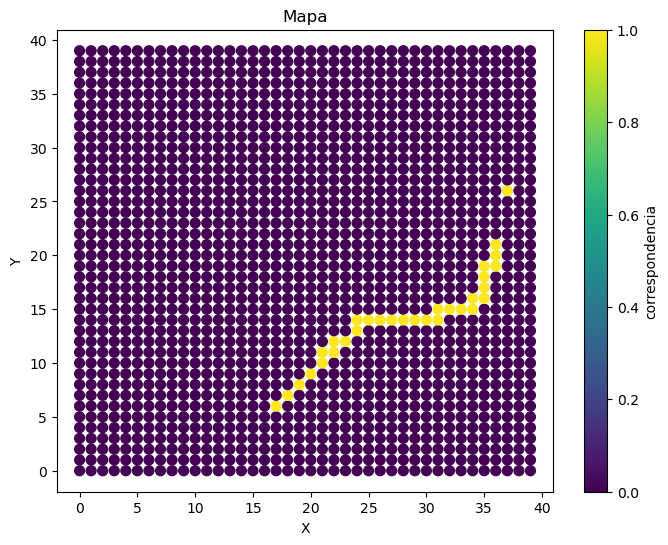

In [228]:
plot_grid(y_pred[2])

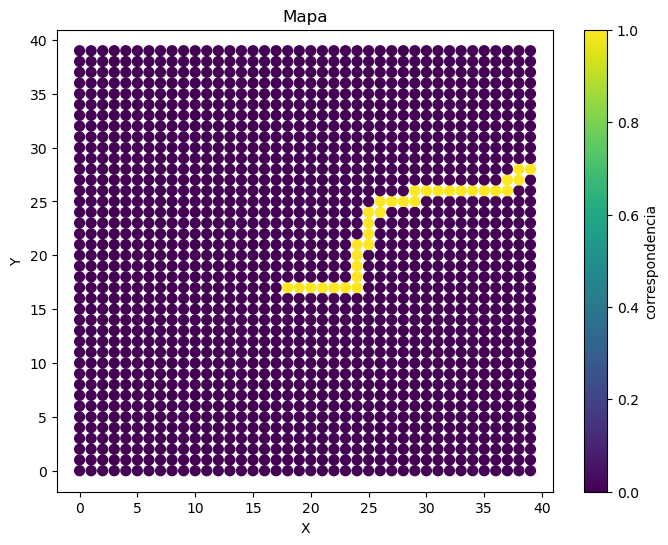

In [229]:
plot_grid(ytest[2])